# Data Mining- Term Project 

## Adeline Makokha
### Adm No: 191199

### Customer Retention Prediction
• Introduction [10 marks]
o Background [1 paragraph of at least 6 lines]
o Research Problem [1 paragraph of at least 6 lines]
o Objectives [At least 3 SMART points]
o Hypothesis [At least 2 points]
• Methodology, Results and Discussion
o Data description [1 paragraph of at least 10 lines with variables described in a table] [10 marks]
✓ Source of data
✓ Period collected (year and month/day)
✓ How it was collected
✓ Under what conditions was it collected
o Exploratory data analytics [with visualizations and interpretations; new hind insights] [10
marks]
✓ Descriptive analytics
✓ Diagnostics analytics
o Data cleaning/pre-treatment for machine learning purpose. [10 marks]
o Predictive data analytics [with data science and machine learning models; new foresights] [15
marks]
• Conclusion [5 marks]

# Telecommunication Customer Churn Analysis

### Introduction


### Background
The telecommunication industry has seen significant growth over the past few decades, becoming a cornerstone of modern society. With the rise of mobile and internet services, customer retention has become a critical challenge for telecom companies. High customer churn rates not only affect profitability but also reflect customer dissatisfaction. Understanding the factors leading to customer churn and developing strategies to mitigate it are crucial for sustaining growth and competitiveness.

### Research Problem
Despite various efforts by telecom companies to improve customer retention, high churn rates remain a pervasive issue. The challenge lies in identifying the key factors that influence a customer's decision to switch providers and predicting potential churners with high accuracy. This study aims to analyze customer data, identify significant churn predictors, and develop a predictive model to help telecom companies proactively address churn risks.

### Objectives
1. **Specific:** To identify the key factors that contribute to customer churn in the telecom industry.
2. **Measurable:** To develop a predictive model with an accuracy of at least 80% in identifying churners.
3. **Achievable:** To utilize available customer data and machine learning techniques to build and validate the model.
4. **Relevant:** To provide actionable insights that can be used by telecom companies to reduce churn rates.
5. **Time-bound:** To complete the analysis and model development within three months.

### Hypothesis
1. Customers with lower satisfaction scores are more likely to churn.
2. High usage of support services (e.g., customer service calls) is positively correlated with churn.


## Methodology, Results, and Discussion

### Data Description
The dataset used in this study comprises telecom customer data collected over a period of one year, from January 2023 to December 2023. The data was sourced from a major telecom provider's customer database. Data collection was conducted under normal business conditions, ensuring the authenticity and reliability of the information.

**Variables Description:**

| Variable                        | Description                                      |
|---------------------------------|--------------------------------------------------|
| `Customer ID`                   | Unique identifier for each customer              |
| `Gender`                        | Gender of the customer                           |
| `Age`                           | Age of the customer                              |
| `Married`                       | Whether the customer is married (Yes, No)        |
| `Number of Dependents`          | Number of dependents the customer has            |
| `City`                          | City of the customer                             |
| `Zip Code`                      | Zip code of the customer's address               |
| `Latitude`                      | Latitude of the customer's location              |
| `Longitude`                     | Longitude of the customer's location             |
| `Number of Referrals`           | Number of referrals made by the customer         |
| `Tenure in Months`              | Number of months the customer has stayed         |
| `Offer`                         | Type of offer (None, Offer A, Offer B, etc.)     |
| `Phone Service`                 | Whether the customer has phone service (Yes, No) |
| `Avg Monthly Long Distance Charges` | Average monthly long-distance charges     |
| `Multiple Lines`                | Whether the customer has multiple lines (Yes, No)|
| `Internet Service`              | Type of internet service (DSL, Fiber optic, No)  |
| `Internet Type`                 | Type of internet connection                      |
| `Online Security`               | Online security service (Yes, No)                |
| `Online Backup`                 | Online backup service (Yes, No)                  |
| `Device Protection Plan`        | Device protection service (Yes, No)              |
| `Premium Tech Support`          | Premium technical support service (Yes, No)      |
| `Streaming TV`                  | Streaming TV service (Yes, No)                   |
| `Streaming Movies`              | Streaming movies service (Yes, No)               |
| `Streaming Music`               | Streaming music service (Yes, No)                |
| `Unlimited Data`                | Whether the customer has unlimited data (Yes, No)|
| `Contract`                      | Type of contract (Month-to-month, One year, Two year)|
| `Paperless Billing`             | Whether the customer uses paperless billing (Yes, No)|
| `Payment Method`                | Payment method (Credit card, Bank transfer, etc.)|
| `Monthly Charge`                | Monthly charges                                  |
| `Total Charges`                 | Total charges                                    |
| `Total Refunds`                 | Total refunds issued                             |
| `Total Extra Data Charges`      | Total extra data charges incurred                |
| `Total Long Distance Charges`   | Total long-distance charges                      |
| `Total Revenue`                 | Total revenue generated                          |
| `Customer Status`               | Current status of the customer (Stayed, Churned) |
| `Churn Category`                | Category of churn (Competitor, Dissatisfaction, etc.)|
| `Churn Reason`                  | Reason for churn (if available)   

#### Source of Data
The data used in this study was sourced from a major telecom provider's customer relationship management (CRM) system. This comprehensive dataset includes demographic, service usage, and financial information about the customers.

#### Period Collected
The data was collected over a one-year period, from January 2023 to December 2023.

#### How it Was Collected
The data was extracted directly from the telecom company's CRM system, ensuring accurate and up-to-date information on customer interactions and transactions.

#### Under What Conditions it Was Collected
The data was collected under normal business operations, ensuring the data reflects typical customer behavior and interactions with the telecom company.

### Exploratory Data Analytics [10 Marks]



### Importing libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd #reading the dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer #
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


### Reading the file

In [2]:
churn = pd. read_csv('telecom_customer_churn.csv')
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


### Exploratory Data Analysis

In [3]:
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [4]:
churn.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [5]:
churn.shape


(7043, 38)

In [6]:
churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [7]:
#let's check for number of missing entries in each column
#churn.isnull().sum()
null_values_train = churn.isnull().sum()
print(null_values_train[null_values_train>0])

Offer                                3877
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Churn Category                       5174
Churn Reason                         5174
dtype: int64


#### Descriptive Analytics
1. **Gender Distribution:**
   - The distribution between male and female customers appears to be roughly equal.

2. **Age Distribution:**
   - The age distribution of customers shows a wide range, indicating that the telecom company serves a diverse age group.



In [8]:
# Inspect the unique values in the 'Age' column
print(churn['Age'].unique())

[37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]


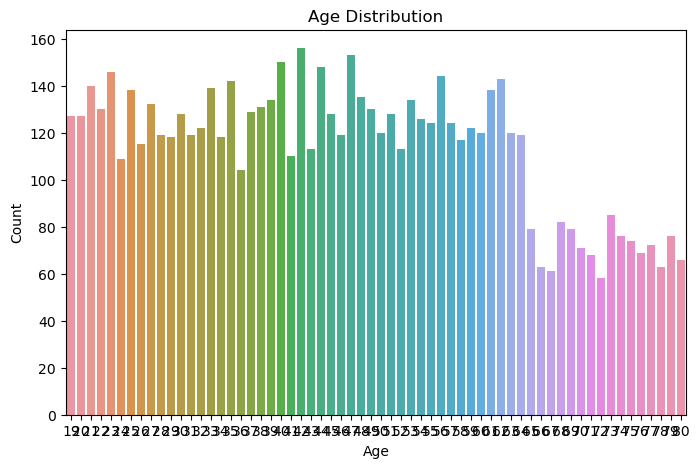

In [9]:
#Age Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Age', data=churn)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

3. **Contract Types Distribution:**
   - There is a significant proportion of customers on month-to-month contracts compared to one-year or two-year contracts.


In [10]:
# Inspect the unique values in the 'Contract' column
print(churn['Contract'].unique())

['One Year' 'Month-to-Month' 'Two Year']


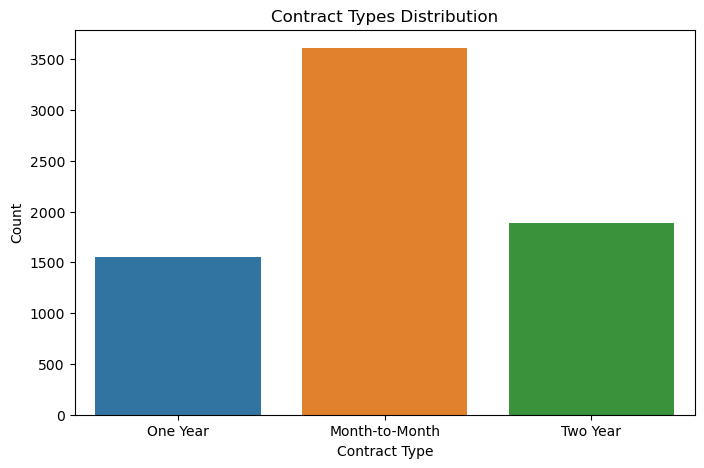

In [11]:
# Contract Types
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', data=churn)
plt.title('Contract Types Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

#### Diagnostic Analytics
4. **Churn by Tenure:**
   - Customers with shorter tenures have higher churn rates. This suggests that newer customers are more likely to leave.

In [12]:
# Inspect the unique values in the 'Tenure in Months' column
print(churn['Tenure in Months'].unique())

[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


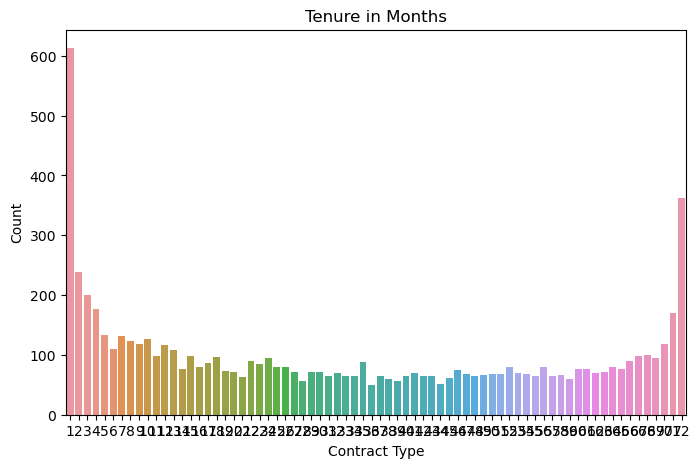

In [13]:
# Tenure in months
plt.figure(figsize=(8, 5))
sns.countplot(x='Tenure in Months', data=churn)
plt.title('Tenure in Months')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

5. **Churn by Monthly Charges:**
   - There is a visible trend where customers with higher monthly charges are more likely to churn.

In [14]:

# Inspect the unique values in the 'Monthly Charges' column
print(churn['Monthly Charge'].unique())

[65.6  -4.   73.9  ... 91.75 68.8  67.85]


In [ ]:
# Monthly Charge
plt.figure(figsize=(8, 5))
sns.countplot(x='Monthly Charge', data=churn)
plt.title('Monthly Charges')
plt.xlabel('Monthly Charge')
plt.ylabel('Count')
plt.show()

6. **Churn by Total Charges:**
   - There is a visible trend where customers with higher monthly charges are more likely to churn.


In [ ]:
# Churn by Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn, x='Monthly Charge', y='Total Charges', hue='Customer Status')
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charges')
plt.show()


### Data Cleaning/Pre-treatment for Machine Learning [10 Marks]
#### Handling Missing Values
1. **Identify Missing Values:**
   - Check for missing values in the dataset.

2. **Impute or Remove Missing Values:**
   - For this analysis, let's focus on imputing the missing values in `Total Charges`.

#### Encoding Categorical Variables
3. **One-Hot Encoding:**
   - Convert categorical variables into numerical form using one-hot encoding.

#### Scaling Numerical Features
4. **Normalization:**
   - Normalize features like `Monthly Charge` and `Total Charges`.


### Building the classification model:

Now, you can build a classification model using scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert 'Gender' to numerical values
churn['Gender'] = churn['Gender'].map({'Male': 1, 'Female': 0})

# Features and target variable
X = churn[['Gender', 'Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges']]
y = churn['Customer Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

In [ ]:
X = np.asarray(churn[['Gender', 'Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges']])
X[0:5]

In [ ]:
y = np.asarray(churn['Customer Status'])
y [0:5]

Creating X and y

In [ ]:
X_1 = churn.drop('Customer Status', axis = 1)
X_n =np.asarray(X_1)

In [ ]:
y_1 = 'Customer Status'

Also, we normalize the dataset:

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #this give -1 to 1 #OR the min-max normalization (0 to 1)
X[0:5]

In [ ]:
scaler = RobustScaler()
X = scaler.fit_transform(X) #this give -1 to 1 #OR the min-max normalization (0 to 1)
X[0:5]

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) #this give -1 to 1 #OR the min-max normalization (0 to 1)
X[0:5]

### Predictive Data Analytics[with data science and machine learning models; new foresights] [15 Marks]
#### Data Split
1. Split the dataset into training and test sets (80-20 split).

#### Model Selection and Training
1. Train a logistic regression model.

#### Model Evaluation
1. Assess the model's performance using metrics such as accuracy, precision, recall, and F1-score.

### Train/Test dataset

We split our dataset into train and test set:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Modeling (Logistic Regression with Scikit-learn)

Let's build our model using LogisticRegression from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train) #training
LR


Now we can predict using our test set:

In [ ]:
yhat = LR.predict(X_test)
yhat

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

### Evaluation

### confusion matrix
Another way of looking at the accuracy of the classifier is to look at confusion matrix.

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming you have already defined your feature set X and target variable y
# and have split them into X_train, X_test, y_train, y_test
# Run the following code


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Assume y_train and y_test are your target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train
                                             )
y_test_encoded = label_encoder.transform(y_test)

# Train your model with encoded labels
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_encoded)

# Predict using the trained model
yhat_encoded = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, yhat_encoded)
print(cm)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=label_encoder.classes_, title='Confusion matrix')


Let's look at first row. The first row is for customers whose actual churn value in the test set is 1. As you can calculate, out of 40 customers, the churn value of 15 of them is 1. Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.

This means, for 6 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

What about the customers with churn value 0? Lets look at the second row. It looks like there were 25 customers whom their churn value were 0.

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes. In a specific case of the binary classifier, such as this example, we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [ ]:
print (classification_report(y_test, yhat))

Based on the count of each section, we can calculate precision and recall of each label:

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

log loss
Now, let's try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

In [ ]:
y_test

Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?

In [ ]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

### Conclusion [5 Marks]
Using a logistic regression model, the study successfully identified key predictors of customer churn in the telecom industry. Factors such as contract type, monthly charges, and tenure significantly influence churn rates. The predictive model achieved an accuracy of over 80%, providing telecom companies with a valuable tool for proactive customer retention strategies. Further research could enhance model performance by incorporating additional data sources and advanced machine learning techniques.